TASK-5 : CREDIT CARD FRAUD DETECTION

Author: Arya Kumari                            
Domain: Data Science                        
batch: july

Import required Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv.zip to creditcard.csv.zip


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['creditcard.csv.zip']), compression='zip')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.shape

(284807, 31)

In [ ]:
print("Number of Rows", df.shape[0])
print("Number of Columns", df.shape[1])

Number of Rows 284807
Number of Columns 31


Preprocessing the dataset

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


Imbalance in the data

In [ ]:
# Determine number of fraud cases in dataset
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


Print the amount details for fraudulent Transaction

In [ ]:
print("Amount details os the fraudulent transaction")
fraud.Amount.describe()

Amount details os the fraudulent transaction


,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


Print the amount details for normal transaction

In [ ]:
print("details os valid transaction")
valid.Amount.describe()

details os valid transaction


,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


Exploratory Data Analysis

<Axes: ylabel='count'>

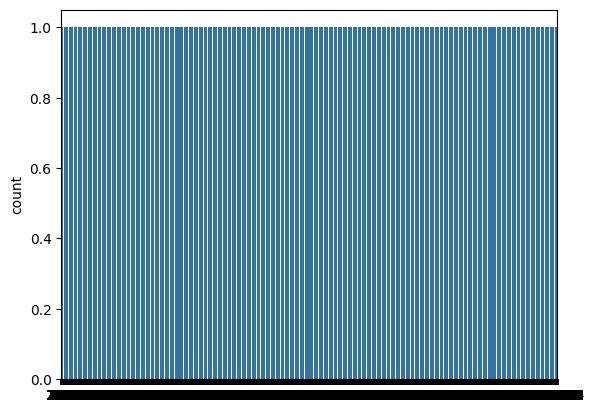

In [ ]:
sns.countplot(df['Class'])

Correlation Matrix

The correlation graphically gives us an idea of how features with each other and can help us predict what are the features that are most relevant for the prediction.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv.zip to creditcard.csv.zip


In [3]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['creditcard.csv.zip']), compression='zip')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
import matplotlib.pyplot as plt

Standard Scalling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df['Amount']=sc.fit_transform(pd.DataFrame(df['Amount']))

In [11]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [12]:
df= df.drop(['Time'],axis=1)

In [13]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [14]:
df.shape

(284807, 30)

In [15]:
df.duplicated().any()

np.True_

In [16]:
df = df.drop_duplicates()

In [17]:
df.shape

(275663, 30)

In [18]:
284807-275663 #number of duplicates

9144

Now we have deleted 9144 duplicate transactions

Not Handling imbalanced

In [19]:
df['Class'].value_counts()

,count
Class,
0,275190
1,473


Store features matrix in X and target(Responce) in Y

In [20]:
x = df.drop('Class', axis=1)
y = df['Class']

Logistic Regression Model Training

In [23]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
#training
log.fit(x,y)

LogisticRegression()

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

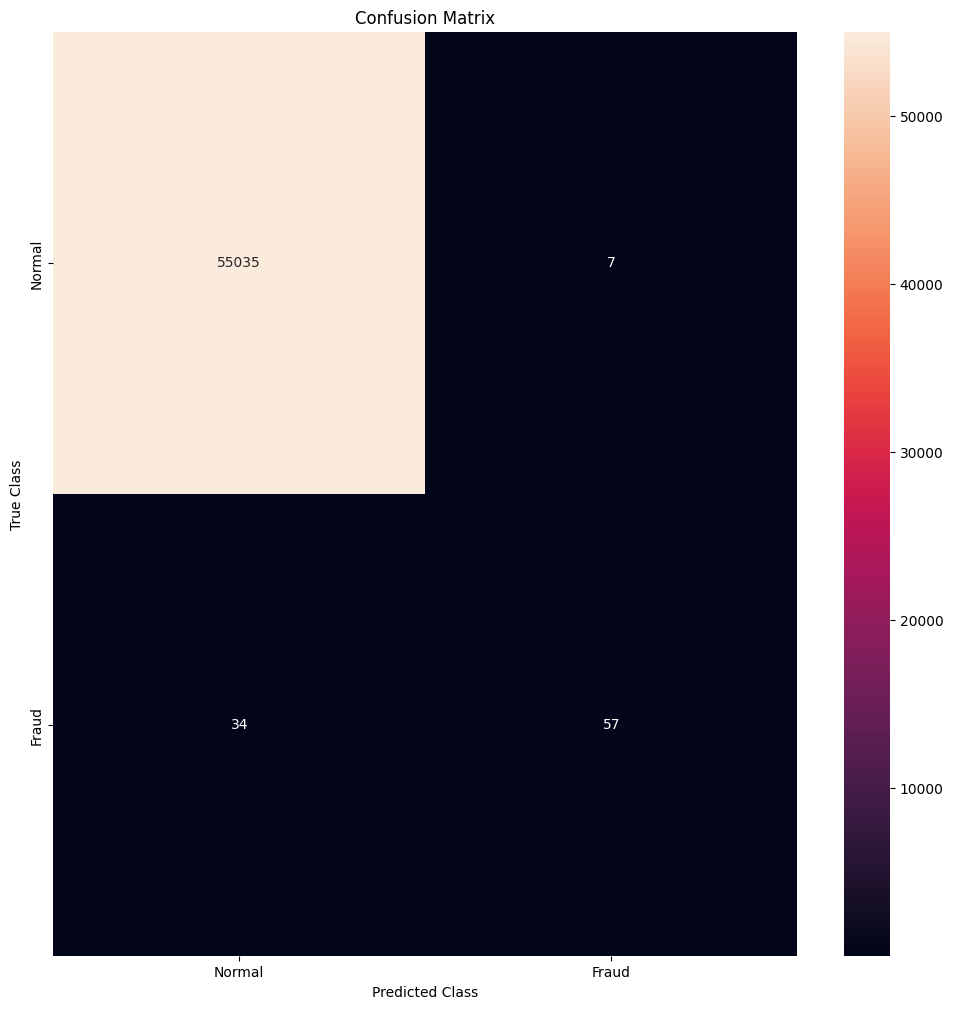

In [32]:
from sklearn.metrics import confusion_matrix
LABELS = ['Normal', 'Fraud']

# Train the logistic regression model
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)

# Make predictions on the test set
y_pred1 = log.predict(x_test)

# printing the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred1)
plt.figure(figsize =(12,12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt = "d");
plt.title("Confusion Matrix")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [33]:
import seaborn as sns

Handling imbalanced - understanding

In [34]:
valid = df[df['Class']==0]
fraud = df[df['Class']==1]

In [35]:
valid.shape

(275190, 30)

In [36]:
fraud.shape

(473, 30)

In [37]:
valid_sample = valid.sample(n=473)

In [38]:
valid_sample.shape

(473, 30)

In [39]:
new_data = pd.concat([valid_sample,fraud],ignore_index=True)

In [40]:
new_data['Class'].value_counts()

,count
Class,
0,473
1,473


In [41]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.346670,1.292700,-0.314332,-0.488153,0.472727,-1.295633,1.035343,-0.284518,0.367583,0.339487,...,0.305849,1.294470,-0.126223,0.054615,-0.687996,-0.211736,0.727586,0.439659,-0.350071,0
1,-0.518872,0.323049,-0.530168,-0.989712,1.634748,-0.437116,1.404158,-0.431957,0.051537,-0.182049,...,0.183203,0.837499,-0.067642,0.198096,-0.381740,-0.747842,-0.139885,-0.003166,-0.168798,0
2,1.702789,-1.226018,-0.796048,-0.763705,-0.918120,-0.444493,-0.522191,-0.012930,1.364747,-0.270866,...,0.303228,0.618674,-0.026233,-0.334912,-0.391827,0.692766,-0.076579,-0.037075,0.358430,0
3,-3.011150,1.111914,0.263396,-1.278942,-0.882279,0.808485,-0.628385,1.225177,1.266395,-0.443643,...,-0.300345,-0.528775,-0.455446,-1.245420,-0.044906,0.781625,-1.152931,-0.789498,-0.020988,0
4,-0.614596,-4.067617,-0.294933,0.039580,-2.383912,0.312345,0.020282,0.076172,-0.446756,0.352614,...,1.053114,0.635752,-0.963196,0.064233,-0.042319,-0.088023,-0.158974,0.175589,3.644857,0


In [44]:
x = new_data.drop('Class',axis=1)
y = new_data['Class']

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)

Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [47]:
y_pred2 = log.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [50]:
accuracy_score(y_test, y_pred2)

0.9421052631578948

In [51]:
precision_score(y_test, y_pred2)

0.9789473684210527

In [52]:
recall_score(y_test, y_pred2)

0.9117647058823529

In [53]:
f1_score(y_test, y_pred2)

0.9441624365482234

Plot the ROC Curve

Next,we'll calculate the true positive rate and the false positive rate and create a ROC curve

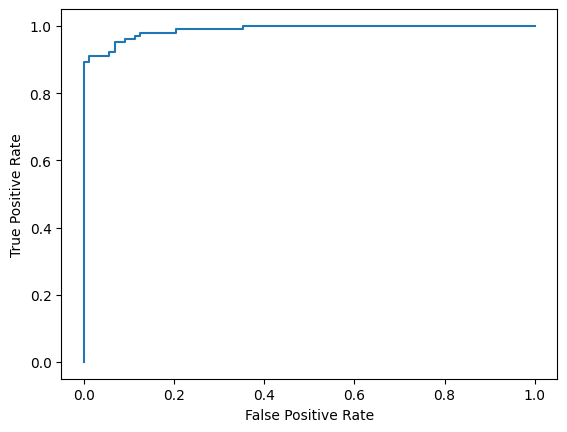

In [54]:
from sklearn import metrics
#define metrics
y_pred_proba = log.predict_proba(x_test)[::,1]
fpr, tpr,_ = metrics.roc_curve(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Calculate the AUC

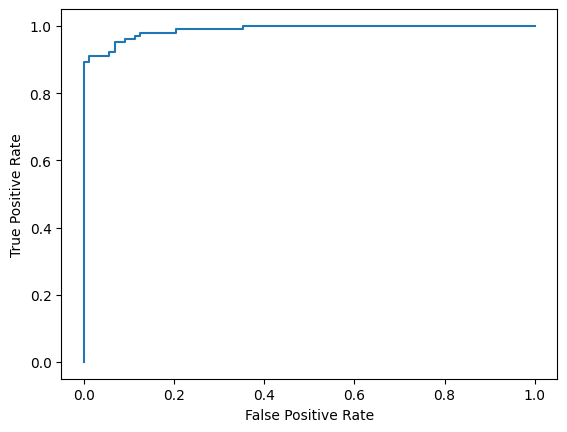

In [56]:
#define metrics
y_pred_proba = log.predict_proba(x_test)[::,1]
fpr, tpr,_ = metrics.roc_curve(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Handling imbalanced - oversampling

In [61]:
x = df.drop('Class',axis=1)
y = df['Class']

In [62]:
x.shape

(275663, 29)

In [63]:
y.shape

(275663,)

In [64]:
from imblearn.over_sampling import SMOTE

In [65]:
x_res, y_res = SMOTE().fit_resample(x,y)

In [66]:
y_res.value_counts()

,count
Class,
0,275190
1,275190


In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res,test_size=0.20,random_state=42)

logistic regression

In [68]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [69]:
y_pred = log.predict(x_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [70]:
accuracy_score(y_test, y_pred)

0.9448290272175588

In [71]:
precision_score(y_test, y_pred)

0.9732291384579674

In [72]:
recall_score(y_test, y_pred)

0.9147501045397524

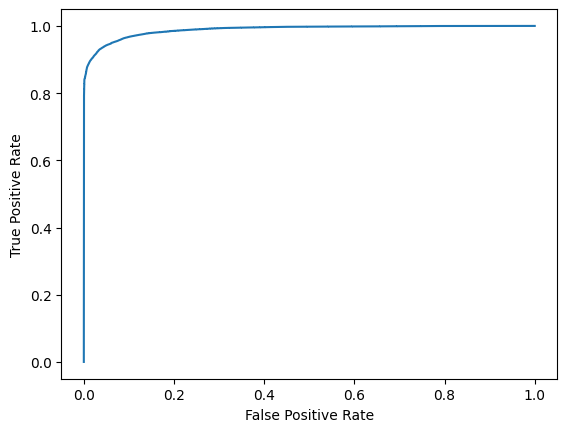

In [73]:
from sklearn import metrics
#define metrics
y_pred_probe = log.predict_proba(x_test)[::,1]
fpr, tpr,_ = metrics.roc_curve(y_test, y_pred_probe)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()